<a href="https://colab.research.google.com/github/silviolima07/Kaggle/blob/master/Pressao_Sanguinea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fatores Correlacionados a Pressão Alta
### Quais fatores mais influenciam a ocorrência de pressão alta?
#### Num grupo de pessoas entre 16 e 35 anos
#### Dois fatores tem quase 80% de importância:
#### - **SBP - Systolic blood pressure**
#### - **DBP - Dystolic blood pressure**
### A importância de outros fatores, pode ser vista no final da análise.
- Detalhes: https://www.hindawi.com/journals/jobe/2014/637635/



![alt text](https://drive.google.com/uc?id=1A2XlJcv6Erj6H4xR0yMhVjynEAIbwTDT)

In [1]:
# Carregando os pacotes
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing


from scipy import stats
from sklearn.preprocessing import StandardScaler
import imblearn

from imblearn.over_sampling import SMOTE

from sklearn import preprocessing, metrics

import warnings
warnings.filterwarnings('ignore')

import os

# Evitar que aparece os warnings
import warnings
warnings.filterwarnings("ignore")

# Seta algumas opções no Jupyter para exibição dos datasets
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.set_option('precision',2)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Funcao para reducao da memoria utilizada
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [3]:
# Funcao para realizar a leitura dos arquivos
def read_data(df,path):
     
        print('Carregando os arquivos de', df)
        data = pd.read_csv(path, encoding='latin',decimal=',')
        data = reduce_mem_usage(data)
        print('Dataset tem {} linhas e {} colunas\n'.format(data.shape[0], data.shape[1]))
        return data

In [4]:
def criar_model(genero,df):
  pred = []
  # Dividir o dataset em X e y.
  # X variáveis preditoras
  # y variável target

  X = df.drop('pressao', axis=1)
  y = df['pressao']
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    
  for i in range(len(lista_algoritmo)):
    modelo[i].fit(X_train, y_train)
    score = modelo[i].score(X_test, y_test)
    pred.append([genero,lista_algoritmo[i], score])
  return pred

In [5]:
def feature_importance(df):
    # Dividir o dataset em X e y
    X = df.drop('pressao', axis=1)
    y = df['pressao']
  
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    rfc = RandomForestClassifier(n_estimators= 500, random_state = 42, n_jobs = -1)
    rfc.fit(X_train, y_train)

    lista_feature = [] # Irá guardar as features avaliadas
    lista_score   = [] # Irá guardar o score de importância da feature
    lista_genero  = [] # Irá guardar o genero dos dados analisados

    from matplotlib import pyplot
    features = df_mulher.columns
    importance = rfc.feature_importances_
    # summarize feature importance
    for i,v in enumerate(importance):
	      #print('Nome:Feature: %0d, Score: %.5f' % (i,v))
        #print('Feature',i,':',features[i], ' Score:',round(v,3))
        lista_feature.append(features[i])
        lista_score.append((round(v,3)))
    # plot feature importance
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.title('\nImportância das Features na Classificação do Modelo\n', fontsize=14, fontweight='bold');
    pyplot.show()  
    return (lista_feature, lista_score)

In [6]:
def show_features():
  data = { 'Feature': [features[0], features[1],
                   features[2], features[3],
                   features[4], features[5],
                   features[6], features[7]],

        'Importancia': [scores[0], scores[1],
                   scores[2], scores[3],
                   scores[4], scores[5],
                   scores[6], scores[7]]}        
      
  df_imp = pd.DataFrame(data, columns=['Feature','Importancia'])
  df_imp.Importancia = np.round(df_imp.Importancia,2)
  #
  print("\nImportância das Features para:\n\t", str.upper(genero),"\n")
  df_imp.sort_values(by='Importancia')
  return df_imp

In [7]:
def sum_and_plot_importances(df):
    X = df.drop('pressao', axis=1)
    y = df['pressao']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    #
    rfc = RandomForestClassifier(n_estimators= 500, random_state = 42, n_jobs = -1)
    rfc.fit(X_train, y_train)
    #
    importances = rfc.feature_importances_
    variables = np.array(df.columns)
    indices = np.argsort(importances)[::-1]
    importances = np.round(importances[indices],4)
    variables = variables[indices]
    # 
    sum_importances = pd.DataFrame()
    for i in range(importances.size):
        sum_importance = importances[:(i+1)].sum()
        this_variable = pd.Series([variables[i], sum_importance])
        sum_importances = sum_importances.append(this_variable, ignore_index = True)
    plt.scatter(sum_importances.index, sum_importances.iloc[:,1])
    return sum_importances

In [8]:
# Leitura dos dados
path1= '/content/drive/MyDrive/Colab Notebooks/Dataset/Pressao_Sanguinea/femtodos.csv'
path2= '/content/drive/MyDrive/Colab Notebooks/Dataset/Pressao_Sanguinea/masctodos.csv'
df_fem = read_data('df_fem',path1)
df_masc = read_data('df_masc',path2)

Carregando os arquivos de df_fem
Mem. usage decreased to  0.01 Mb (63.3% reduction)
Dataset tem 224 linhas e 10 colunas

Carregando os arquivos de df_masc
Mem. usage decreased to  0.00 Mb (63.2% reduction)
Dataset tem 175 linhas e 10 colunas




### Fatores analisados:
#### - idade, 
#### - obesidade, 
#### - indice de massa corporea (BMI- body mass index)
#### - circunferência da cintura (WC- waist circumference)
#### - circunferência do quadril (HC - hip circumference)
#### - razão da circunferência da cintura(WHR - waist hip ratio),
#### - SBP - Systolic blood pressure
#### - DBP - Dystolic blood pressure
### A coluna preh é a classificação do dataset

In [9]:
df_fem.head()

,id,Age,Is.Obese,bmi,wc,hc,whr,SBP,DBP,preh
0,1,31,NO,28.77,88,101,87,128.00,74.31,PRE
1,7,21,NO,27.59,86,110,78,123.31,70.00,PRE
2,8,23,NO,22.45,72,104,69,90.00,56.66,REGULAR
3,13,24,NO,28.16,89,108,82,126.69,90.00,PRE
4,15,20,NO,25.05,81,108,75,120.00,69.00,REGULAR


### Ajustes iniciais para facilitar a compreensão da análise

In [10]:

df_fem['sexo'] = 0
df_masc['sexo'] = 1
#
df_fem['genero'] = 'Mulher'
df_masc['genero'] = 'Homem'
#
df_fem['pressao'] =df_fem.preh
df_fem.drop(columns=['preh'], inplace=True)
#
df_masc['pressao'] =df_masc.hyper
df_masc.drop(columns=['hyper'], inplace=True)
#
df_masc.drop(columns=['id'], inplace=True)
df_fem.drop(columns=['id'], inplace=True)

In [11]:
df = pd.concat([df_fem,df_masc])

In [12]:
df.columns

Index(['Age', 'Is.Obese', 'bmi', 'wc', 'hc', 'whr', 'SBP', 'DBP', 'sexo',
       'genero', 'pressao'],
      dtype='object')

In [13]:
df = df.rename(columns={"Age": "idade", "Is.Obese": "obeso"})

In [14]:
status_obeso = np.where(df.obeso == 'NO',0,1)
df.obeso = status_obeso

#### Classificação original no dataset

In [15]:
df.pressao.value_counts()

REGULAR    257
PRE         95
HYPER       47
Name: pressao, dtype: int64

### Valores Atualizados com novas classificações

#### **Valores de pressão Sistólica e Diastólica**

#### Normal: Menos de 120/80 mmHg;

#### Elevado: PA sistólica entre 120-129 e PA diastólica inferior a 80;

#### Hipertensão Fase 1: Sistólica entre 130-139 ou diastólica entre 80-89;

#### Hipertensão Fase 2: Sistólica pelo menos 140 ou diastólica pelo menos 90 mm Hg;

#### Crise hipertensiva: Sistólica superior a 180 mmHg e/ou Diastólica acima de 120 mmHg, com pacientes que necessitam de mudanças imediatas na medicação em pacientes sem sintomas relevantes, ou hospitalização imediata se houver sinais de danos nos órgãos-alvos.

#### Fonte:https://www.assistenciafarmaceutica.far.br/novos-valores-de-referencia-para-hipertensao-o-que-mudou/

In [16]:
# Valores fora do filtros, Normal, Alta, Pre_Hiper1, Pre_Hiper2 e Hiper, foram considerados Alta.
# Assim casos onde o valores de SBP ou DBP são altos, indicam uma atenção maior.
# Exemplo: SBP: 125 e DBP: 82 não se enquadra como Alta, mas foi considerado o valor acima de 120 pra SBP
#
pressao = np.where((df.SBP < 120) & (df.DBP <80), "Normal", 
                    np.where((df.SBP > 120) & (df.SBP <=129) & (df.DBP < 80), "Alta",
                             np.where((df.SBP > 130) & (df.SBP <=139) | (df.DBP > 80) & (df.DBP < 90), "Pre_Hiper_Fase1",
                                      np.where((df.SBP >= 140) | (df.DBP >= 90), "Pre_Hiper_Fase2",
                                               np.where((df.SBP > 180) & (df.DBP > 120), "Hiper", 'Alta')))))

In [17]:
df['pressao'] = pressao

#### Temos agora um dataset de 399 linhas com a classificação de pressão com valores atualizados.

In [18]:
df.shape

(399, 11)

### Qual o percentual de ocorrência de cada tipo no dataset?

In [19]:
df.pressao.value_counts(normalize=True)

Normal             0.35
Pre_Hiper_Fase1    0.28
Pre_Hiper_Fase2    0.19
Alta               0.17
Name: pressao, dtype: float64

#### Gêneros presentes no dataset

In [20]:
print("Total")
print(df['genero'].value_counts(ascending=True))
#
print("\nPercentual")
print(df['genero'].value_counts(ascending=True,normalize=True))


Total
Homem     175
Mulher    224
Name: genero, dtype: int64

Percentual
Homem     0.44
Mulher    0.56
Name: genero, dtype: float64


#### Valores de ocorrência por gênero

In [21]:
df.groupby(['genero', 'pressao']).size()

genero  pressao        
Homem   Alta                37
        Normal              26
        Pre_Hiper_Fase1     66
        Pre_Hiper_Fase2     46
Mulher  Alta                32
        Normal             115
        Pre_Hiper_Fase1     47
        Pre_Hiper_Fase2     30
dtype: int64

### Criação de 5 grupos por idade
#### No dataset identifica-se que a grande maioria dos participantes tem idade entre 16 e 25 anos, somando 306 participantes.
#### Grupos com poucos participantes podem ser desconsiderados, pois a classificação pode não ter dados suficientes para uma alta acurácia.

In [22]:
df['idade'].value_counts(bins=5)

(15.952, 25.4]    306
(25.4, 34.8]       74
(34.8, 44.2]       12
(44.2, 53.6]        6
(53.6, 63.0]        1
Name: idade, dtype: int64

#### Faixas de idade

In [23]:
df['faixa']=pd.cut(df.idade,bins = [0,16,26,35,44,54,63],labels=['Até 16','Entre 16 e 26','Entre 26 e 35','Entre 35 e 44', 'Entre 44 e 54', 'Acima de 54'])

### As faixas que mais apresentam ocorrências são:
- Entre 16 e 26
- Entre 26 e 35

In [24]:
df.groupby(['faixa', 'pressao']).size()

faixa          pressao        
Até 16         Alta                 0
               Normal               1
               Pre_Hiper_Fase1      1
               Pre_Hiper_Fase2      0
Entre 16 e 26  Alta                60
               Normal             114
               Pre_Hiper_Fase1     87
               Pre_Hiper_Fase2     57
Entre 26 e 35  Alta                 9
               Normal              24
               Pre_Hiper_Fase1     21
               Pre_Hiper_Fase2     12
Entre 35 e 44  Alta                 0
               Normal               0
               Pre_Hiper_Fase1      2
               Pre_Hiper_Fase2      4
Entre 44 e 54  Alta                 0
               Normal               1
               Pre_Hiper_Fase1      2
               Pre_Hiper_Fase2      3
Acima de 54    Alta                 0
               Normal               1
               Pre_Hiper_Fase1      0
               Pre_Hiper_Fase2      0
dtype: int64

### Separar os dois conjuntos de dados e criar um único dataset formado a partir deles.

In [25]:
df_16_35 = df.loc[(df.faixa == 'Entre 16 e 26')|(df.faixa == 'Entre 26 e 35')]

In [26]:
df2 = df_16_35

In [27]:
# O dataset df2 mantém ainda as categorias mesmo com valores zero, assim é preciso remover as categorias não usadas.
df2.faixa = df2.faixa.cat.remove_unused_categories()

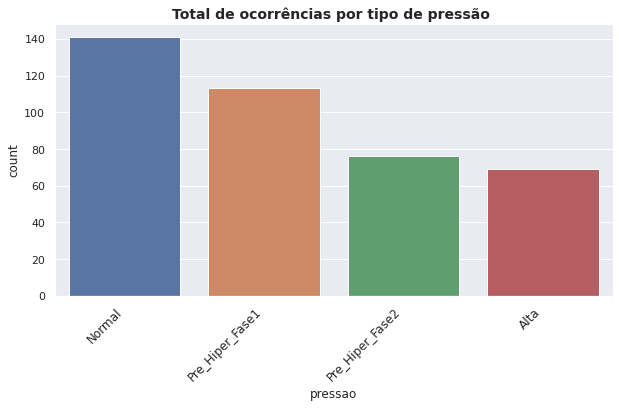

In [28]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='pressao', data=df, order=df['pressao'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)
plt.title('Total de ocorrências por tipo de pressão ', fontsize=14, fontweight='bold');

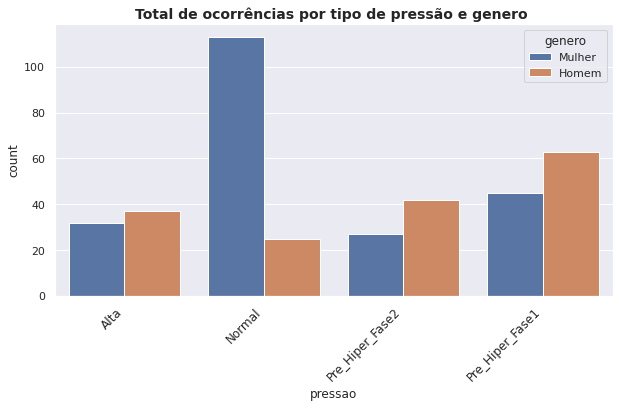

In [29]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="pressao", hue="genero", data=df2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)
plt.title('Total de ocorrências por tipo de pressão e genero ', fontsize=14, fontweight='bold');

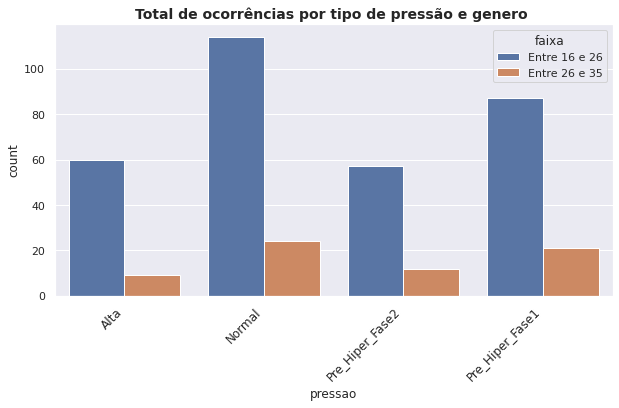

In [30]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="pressao", hue="faixa", data=df2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)
plt.title('Total de ocorrências por tipo de pressão e genero ', fontsize=14, fontweight='bold');

In [31]:
def countplot(x, hue, **kwargs):
    data=kwargs.pop("data")
    order=np.unique(data["pressao"].values)
    sns.countplot(x, hue=hue, data=data,order=order,**kwargs)

<Figure size 1440x1440 with 0 Axes>

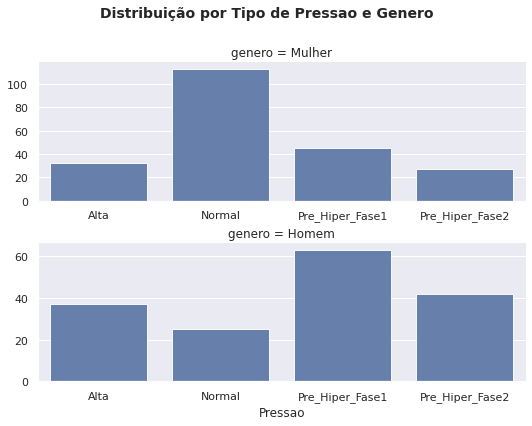

In [32]:
plt.figure(figsize=(20,20))
g = sns.FacetGrid(df2, row='genero',  size=3, aspect=2.5, sharex=False, sharey=False)
g.map_dataframe(countplot, 'pressao',hue='genero', alpha=.9,
                palette=sns.color_palette(),  )

g.fig.suptitle('Distribuição por Tipo de Pressao e Genero',fontsize=14, fontweight='bold')
g.fig.subplots_adjust(top=.85)
g.set_xlabels('Pressao')

plt.show();

In [33]:
df_plot = df2.groupby(['genero', 'pressao']).size().reset_index().pivot(columns='genero', index='pressao', values=0)

In [34]:
df_plot

genero,Homem,Mulher
pressao,,
Alta,37,32
Normal,25,113
Pre_Hiper_Fase1,63,45
Pre_Hiper_Fase2,42,27


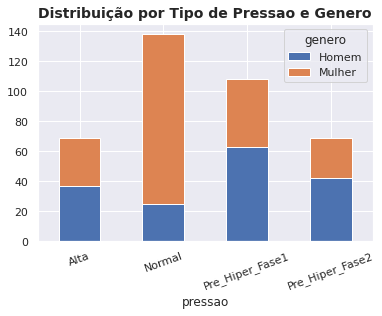

In [35]:
df_plot.plot(kind='bar', rot=20,stacked=True)
plt.title('Distribuição por Tipo de Pressao e Genero', fontsize=14, fontweight='bold');

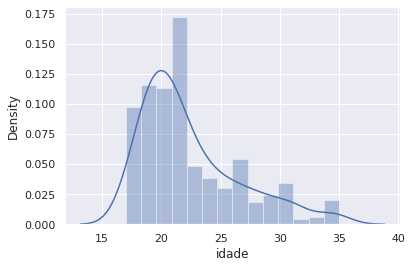

In [36]:
# Distribuição das idades
sns.distplot(df2['idade']);

### Qual a média de idade em cada genero e faixa ?

#### A partir da tabela abaixo temos a idade média pra cada gênero e faixa e pressão identificada nesse dataset
#### Essa informação pode orientar a análise

In [37]:
pd.pivot_table(df2,index=["genero","faixa",'pressao'],values=["idade"],aggfunc=np.mean)

idade
genero faixa         pressao               
Homem  Entre 16 e 26 Alta             20.79
                     Normal           20.62
                     Pre_Hiper_Fase1  20.90
                     Pre_Hiper_Fase2  21.19
       Entre 26 e 35 Alta             29.00
                     Normal           29.67
                     Pre_Hiper_Fase1  30.27
                     Pre_Hiper_Fase2  30.17
Mulher Entre 16 e 26 Alta             21.12
                     Normal           20.52
                     Pre_Hiper_Fase1  20.56
                     Pre_Hiper_Fase2  21.48
       Entre 26 e 35 Alta             29.67
                     Normal           29.80
                     Pre_Hiper_Fase1  31.67
                     Pre_Hiper_Fase2  29.83

### Separando o dataset por genero
### Assim a análise usará apenas os dados de cada grupo separadamente

In [38]:
df_mulher = df2.loc[df2.genero == 'Mulher']
#
# As coluna genero, sexo e faixa não serão utilizadas no treinamento do modelo
df_mulher = df_mulher.drop(['genero', 'sexo', 'faixa'], axis=1)
#
df_homem = df2.loc[df2.genero == 'Homem']
df_homem = df_homem.drop(['genero', 'sexo', 'faixa'], axis=1)

### Removendo colunas que não serão utilizadas no treinamento do modelo

In [39]:
df_mulher.describe().T

,count,mean,std,min,25%,50%,75%,max
idade,217.0,22.15,4.17,17.00,19.00,21.00,24.00,35.00
obeso,217.0,0.05,0.22,0.00,0.00,0.00,0.00,1.00
bmi,217.0,23.16,4.02,16.23,20.34,22.45,25.48,45.16
wc,217.0,76.69,9.32,61.00,70.00,76.00,81.00,113.00
hc,217.0,100.79,8.61,79.00,94.00,100.00,106.00,132.00
whr,217.0,76.03,5.71,64.00,73.00,76.00,79.00,104.00
SBP,217.0,118.31,15.91,10.67,108.69,116.69,127.69,160.62
DBP,217.0,75.88,12.02,7.00,68.31,74.00,81.69,120.00


In [40]:
df_homem.describe().T

,count,mean,std,min,25%,50%,75%,max
idade,167.0,22.71,4.27,17.00,19.00,21.00,25.00,35.00
obeso,167.0,0.10,0.30,0.00,0.00,0.00,0.00,1.00
bmi,167.0,24.84,4.36,17.09,22.05,24.66,26.95,43.59
wc,167.0,85.63,11.43,48.00,79.00,83.00,92.00,126.00
hc,167.0,102.86,9.03,80.00,97.00,103.00,108.00,130.00
whr,167.0,83.12,6.66,49.00,80.00,82.00,87.00,114.00
SBP,167.0,132.12,14.48,98.00,122.84,130.00,140.50,175.00
DBP,167.0,82.31,11.36,50.00,76.31,81.31,89.50,112.00


In [41]:
df_homem.head()

,idade,obeso,bmi,wc,hc,whr,SBP,DBP,pressao
0,20,0,27.94,95,112,85,120.00,80.00,Alta
1,19,0,18.66,69,85,81,100.00,63.34,Normal
2,31,0,27.62,102,107,95,106.69,70.00,Normal
3,22,0,24.95,86,107,80,120.00,80.00,Alta
4,19,0,25.16,82,99,83,126.69,80.00,Alta


## Treinamento do Modelo

### Identificado um desbalanceamento da variável pressão
### isso irá impactar na classificação correta do modelo

In [42]:
df_mulher.groupby('pressao').size()

pressao
Alta                32
Normal             113
Pre_Hiper_Fase1     45
Pre_Hiper_Fase2     27
dtype: int64

Normal         : 113
Alta           : 32
Pre_Hiper_Fase1: 45
Pre_Hiper_Fase2: 27


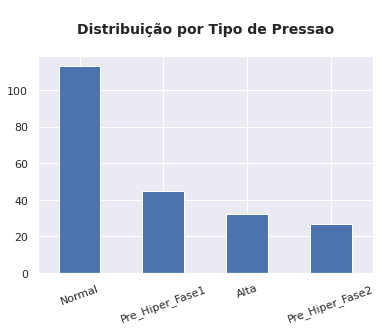

In [43]:
# Total de mulheres de acordo com o tipo de pressao
target_count = df_mulher['pressao'].value_counts()
print('Normal         :', target_count[0])
print('Alta           :', target_count[2])
print('Pre_Hiper_Fase1:', target_count[1])
print('Pre_Hiper_Fase2:', target_count[3])

target_count.plot(kind='bar', title='Count (pressao)', rot=20);
plt.title('\nDistribuição por Tipo de Pressao\n', fontsize=14, fontweight='bold');

### Criar, treinar e avaliar o modelo de classificação

In [44]:
lista_algoritmo=['ExtraTreeClassifier', 'RandomForestClassifier'] 
modelo = [ExtraTreesClassifier(n_estimators=100, random_state=0), RandomForestClassifier(n_estimators= 500, random_state = 42, n_jobs = -1)]

In [45]:
out_homem= criar_model('Homem',df_homem)


In [46]:
out_mulher = criar_model('Mulher',df_mulher)

In [47]:
out_mulher

[['Mulher', 'ExtraTreeClassifier', 0.7454545454545455],
 ['Mulher', 'RandomForestClassifier', 0.8363636363636363]]

In [48]:
data = { 'Genero': [out_homem[0][0], out_homem[1][0],
                   out_mulher[0][0], out_mulher[1][0]],

        'Modelo':  [out_homem[0][1], out_homem[1][1],
                   out_mulher[0][1], out_mulher[1][1]],

        'Acurácia': [out_homem[0][2], out_homem[1][2],
                    out_mulher[0][2], out_mulher[1][2]]}        
      
df_scores = pd.DataFrame(data, columns=['Genero','Modelo', 'Acurácia'])
df_scores

,Genero,Modelo,Acurácia
0,Homem,ExtraTreeClassifier,0.67
1,Homem,RandomForestClassifier,0.79
2,Mulher,ExtraTreeClassifier,0.75
3,Mulher,RandomForestClassifier,0.84


### Selecionando as variáveis mais importantes
#### O Modelo com maior acurácia foi utilizado, nesse caso:
#### - RandomForestClassifier


### Informe o dataset que será analisado
### Informe o genero do dataset

In [53]:
df = df_homem
genero = 'homem'

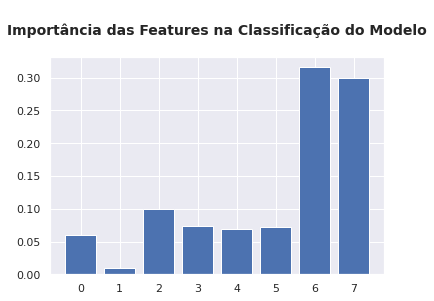

In [54]:
features,scores = feature_importance(df)

### Duas Features se destacam com maior importância no dataset
### SBP e DBP


In [55]:
show_features()


Importância das Features para:
	 HOMEM 



,Feature,Importancia
0,idade,0.06
1,obeso,0.01
2,bmi,0.10
3,wc,0.07
4,hc,0.07
5,whr,0.07
6,SBP,0.32
7,DBP,0.30


### Com 4 variáveis já temos um alto valor das Features mais importantes 

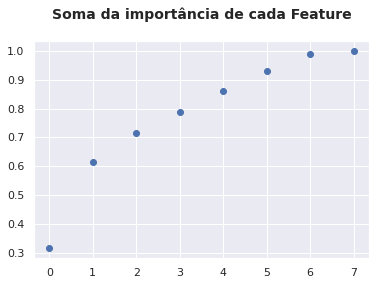

In [56]:
sum_importances = sum_and_plot_importances(df)
plt.title('Soma da importância de cada Feature\n', fontsize=14, fontweight='bold');

### Outras features poderiam ser incluídas para melhorar a acurácia do modelo.
### Por exemplo incluir:
#### - se a pessoa fuma, 
#### - se tem o hábito de beber, 
#### - se possui histórico familiar,
#### - stress,
#### - ansiedade,
#### - horas de sono

### O balanceamento das classes no dataset de cada conjunto pode aumentar a
### acurácia do modelo treinado.